T5 BASED MODEL TRAINING.

CREATING A python enviornmnet. 

In [1]:
!python3 -m venv med-nlp-env


In [2]:
!source med-nlp-env/bin/activate


In [3]:
!pip install --upgrade pip
!pip install pandas numpy scikit-learn spacy transformers torch jupyter ipykernel


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
!python -m ipykernel install --user --name=med-nlp-env --display-name "Med NLP Env"


[Errno 13] Permission denied: '/packages/apps/jupyter/kernels/med-nlp-env'
Perhaps you want `sudo` or `--user`?


In [6]:
!jupyter notebook


[I 2025-04-21 02:37:09.984 ServerApp] Extension package voila.server_extension took 0.2289s to import
[I 2025-04-21 02:37:09.984 ServerApp] jupyter_lsp | extension was successfully linked.
[I 2025-04-21 02:37:09.986 ServerApp] jupyter_server_terminals | extension was successfully linked.
[I 2025-04-21 02:37:09.989 ServerApp] jupyterlab | extension was successfully linked.
[I 2025-04-21 02:37:09.992 ServerApp] mamba_gator | extension was successfully linked.
[I 2025-04-21 02:37:09.994 ServerApp] notebook | extension was successfully linked.
/packages/apps/jupyter/2025-03-24/lib/python3.12/site-packages/traitlets/traitlets.py:1897: DeprecationWarning: ServerApp.token config is deprecated in jupyter-server 2.0. Use IdentityProvider.token
  return t.cast(Sentinel, self._get_trait_default_generator(names[0])(self))
[I 2025-04-21 02:37:10.371 ServerApp] notebook_shim | extension was successfully linked.
[I 2025-04-21 02:37:10.371 ServerApp] voila.server_extension | extension was successfully

In [7]:
import pandas as pd
import spacy
import NLTK
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df18 = pd.read_csv("processed_patient_details.csv")
df18.head()

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,INCOME,CONDITION_NOTES,MEDICATION_NOTES,PROCEDURE_NOTES,ENCOUNTER_NOTES,Height_cm,Weight_kg,Smoking_Status,DESCRIPTION,CATEGORY
0,bb64a0b9-fde6-8eb9-9bd4-595ee81102e9,11/23/22,No Data,999-60-3771,No Data,No Data,No Data,Jonnie215,Babette571,Armstrong51,...,56728,"Medication review due (situation), Medication ...","Penicillin V Potassium 250 MG Oral Tablet, Amo...","Medication reconciliation (procedure), Medicat...","Well child visit (procedure), Well child visit...",53.6,4.3,Never smoked tobacco (finding),NaN,NaN
1,8449b92e-caf1-bb7b-4b56-9d922afb97aa,5/5/01,No Data,999-54-2905,S99960934,X43904833X,Mr.,Anderson154,Ivory697,Harvey63,...,755369,"Medication review due (situation), Sprain (mor...","Naproxen sodium 220 MG Oral Tablet, Acetaminop...","Assessment of anxiety (procedure), Depression ...","Well child visit (procedure), Well child visit...",153.2,46.2,Never smoked tobacco (finding),NaN,NaN
2,66fe0086-1766-9b60-7969-02bf4b23a990,7/20/01,No Data,999-23-1258,S99956972,X71259817X,Ms.,Kiana854,No Data,Larkin917,...,47178,"Medication review due (situation), Risk activi...","Loratadine 5 MG Chewable Tablet, NDA020800 0.3...","Subcutaneous immunotherapy (procedure), Subcut...","Encounter for problem (procedure), Encounter f...",159.0,64.2,Never smoked tobacco (finding),Allergy to substance (finding),environment
3,66fe0086-1766-9b60-7969-02bf4b23a990,7/20/01,No Data,999-23-1258,S99956972,X71259817X,Ms.,Kiana854,No Data,Larkin917,...,47178,"Medication review due (situation), Risk activi...","Loratadine 5 MG Chewable Tablet, NDA020800 0.3...","Subcutaneous immunotherapy (procedure), Subcut...","Encounter for problem (procedure), Encounter f...",159.0,64.2,Never smoked tobacco (finding),Mold (organism),environment
4,66fe0086-1766-9b60-7969-02bf4b23a990,7/20/01,No Data,999-23-1258,S99956972,X71259817X,Ms.,Kiana854,No Data,Larkin917,...,47178,"Medication review due (situation), Risk activi...","Loratadine 5 MG Chewable Tablet, NDA020800 0.3...","Subcutaneous immunotherapy (procedure), Subcut...","Encounter for problem (procedure), Encounter f...",159.0,64.2,Never smoked tobacco (finding),Shellfish (substance),food


In [9]:
unnecessary_columns = ['SSN', 'DRIVERS', 'PASSPORT', 'FIPS', 'BIRTHDATE', 'DEATHDATE', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE','INCOME','SUFFIX', 'LAST', 'MIDDLE', 'FIRST', 'ADDRESS', 'LAT', 'LON', 'MAIDEN', 'PREFIX']
df18.drop(columns=unnecessary_columns, inplace=True)
print(df18.columns)

Index(['PATIENT', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
       'CITY', 'STATE', 'COUNTY', 'ZIP', 'CONDITION_NOTES', 'MEDICATION_NOTES',
       'PROCEDURE_NOTES', 'ENCOUNTER_NOTES', 'Height_cm', 'Weight_kg',
       'Smoking_Status', 'DESCRIPTION', 'CATEGORY', 'AGE'],
      dtype='object')


In [10]:
pd.set_option('display.max_colwidth', None)
print(df18.MEDICATION_NOTES.head(5))

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Penicillin V Potassium 250 MG Oral Tablet, Amoxicillin 500 MG Oral Tablet, Ibuprofen 100 MG Oral 

In [11]:
df18.to_csv('output.csv', index=False)


In [12]:
!pip install transformers==4.36.2 peft==0.10.0 accelerate


Defaulting to user installation because normal site-packages is not writeable


In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
print("✅ All good!")


/home/amodi17/.local/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/amodi17/.local/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/amodi17/.local/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


✅ All good!


In [14]:
!pip install accelerate==0.26.0


Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install sentencepiece


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    if pd.isna(text):
        return ""
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])


/home/amodi17/.local/lib/python3.12/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/amodi17/.local/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Precision,Recall,Exact Match
1,0.797000,0.518592,0.126918,0.112184,0.150112,0.000000
2,0.394700,0.271852,0.252909,0.231004,0.286779,0.000000
3,0.281400,0.211717,0.312434,0.289677,0.347735,0.009901
4,0.260000,0.182969,0.328291,0.303176,0.366071,0.004950
5,0.207400,0.168186,0.351140,0.322086,0.394953,0.000000
6,0.201500,0.158971,0.393295,0.365690,0.436076,0.009901
7,0.186600,0.142617,0.444522,0.417946,0.482306,0.054455
8,0.161300,0.137885,0.450316,0.422100,0.491647,0.029703
9,0.154200,0.130372,0.482722,0.456945,0.520570,0.054455
10,0.148100,0.128039,0.474503,0.447074,0.514129,0.034653


Checkpoint destination directory t5_medication_model/checkpoint-202 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/home/amodi17/.local/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/amodi17/.local/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/amodi17/.local/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/amodi17/.local/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but

Test Results: {'eval_loss': 0.11356513202190399, 'eval_f1': 0.6796547834707262, 'eval_precision': 0.6593786164330719, 'eval_recall': 0.7110334247710486, 'eval_exact_match': 0.45544554455445546, 'eval_runtime': 5.1162, 'eval_samples_per_second': 39.482, 'eval_steps_per_second': 5.082, 'epoch': 80.0}


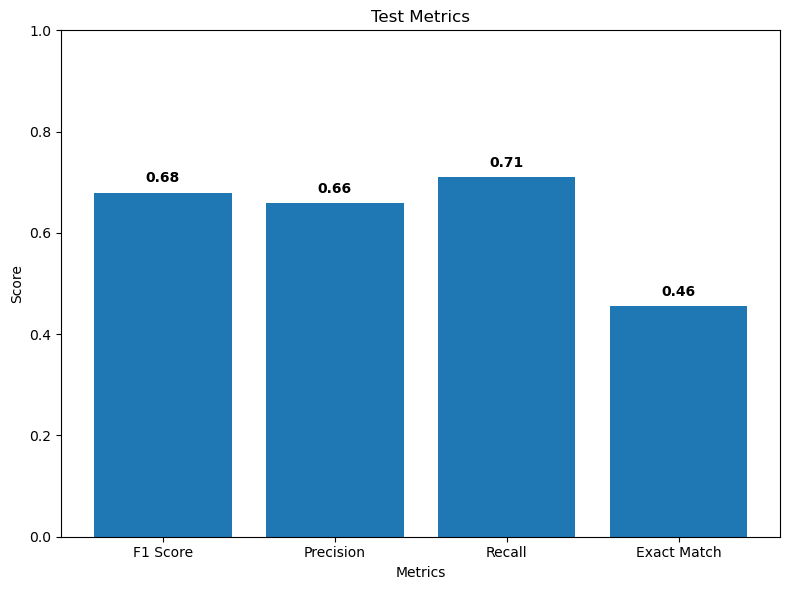


Sample Predictions:
------------------------------------------------------------

Input:
predict medications: encounter: well child visit procedure, well child visit procedure, well child visit procedure, well child visit procedure, emergency room admission procedure, encounter for problem procedure, encounter for problem procedure, well child visit procedure, well child visit procedure, well child visit procedure, well child visit procedure, well child visit procedure, well child visit procedure | procedure: injection of epinephrine procedure, allergy screening test procedure, medication reconciliation procedure, medication reconciliation procedure, medication reconciliation procedure, medication reconciliation procedure | condition: medication review due situation, acute allergic reaction disorder, medication review due situation, medication review due situation, medication review due situation | age: 0 | gender: F | marital: No Data | race: white | ethnicity: nonhispanic | city: Te

In [ ]:
import pandas as pd
import numpy as np
import torch
import os
import re
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import (
    T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, EvalPrediction
)

# Set seed
np.random.seed(42)
torch.manual_seed(42)

# Load data
def load_data(csv_path):
    df = pd.read_csv(csv_path)
    required_cols = [
        "MEDICATION_NOTES", "ENCOUNTER_NOTES", "PROCEDURE_NOTES",
        "CONDITION_NOTES", "AGE", "GENDER", "MARITAL"
    ]
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"CSV must contain columns: {required_cols}")
    return df

# Clean and prepare text
def preprocess_data(df):
    def clean_text(text):
        if pd.isna(text):
            return ""
        text = str(text).lower()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s\/\.\-\,]', '', text)
        return text.strip()
    def lemmatize_text(text):
        if pd.isna(text):
            return ""
        doc = nlp(text.lower())
        return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])

    # Clean unstructured text
    for col in ["ENCOUNTER_NOTES", "PROCEDURE_NOTES", "CONDITION_NOTES"]:
        df[col] = df[col].apply(clean_text)
    # Lemmatize unstructured clinical notes
    for col in ["ENCOUNTER_NOTES", "PROCEDURE_NOTES", "CONDITION_NOTES"]:
        df[col] = df[col].apply(lemmatize_text)


    # Fill missing structured fields
    df["AGE"] = df["AGE"].fillna(df["AGE"].median()).astype(int)
    df["GENDER"] = df["GENDER"].fillna("unknown")
    df["MARITAL"] = df["MARITAL"].fillna("unknown")
    df["RACE"] = df["RACE"].fillna("unknown")
    df["ETHNICITY"] = df["ETHNICITY"].fillna("unknown")
    df["CITY"] = df["CITY"].fillna("unknown")
    df["STATE"] = df["STATE"].fillna("unknown")
    df["COUNTY"] = df["COUNTY"].fillna("unknown")
    df["ZIP"] = df["ZIP"].fillna("unknown")
    df["Height_cm"] = df["Height_cm"].fillna("unknown")
    df["Weight_kg"] = df["Weight_kg"].fillna("unknown")
    df["Smoking_Status"] = df["Smoking_Status"].fillna("unknown")

    # Create input_text for model training with all the updated fields
    df["input_text"] = df.apply(
        lambda row: (
            f"predict medications: encounter: {row['ENCOUNTER_NOTES']} | "
            f"procedure: {row['PROCEDURE_NOTES']} | "
            f"condition: {row['CONDITION_NOTES']} | "
            f"age: {row['AGE']} | gender: {row['GENDER']} | marital: {row['MARITAL']} | "
            f"race: {row['RACE']} | ethnicity: {row['ETHNICITY']} | city: {row['CITY']} | "
            f"state: {row['STATE']} | county: {row['COUNTY']} | zip: {row['ZIP']} | "
            f"height_cm: {row['Height_cm']} | weight_kg: {row['Weight_kg']} | "
            f"smoking_status: {row['Smoking_Status']}"
        ),
        axis=1
    )

    # Target is the medication notes
    df["target_text"] = df["MEDICATION_NOTES"].astype(str).str.lower().str.strip()

    # Filter out rows where target is missing
    df = df[df["target_text"] != ""]

    return df[["input_text", "target_text"]]

# Dataset class
class MedicationDataset(torch.utils.data.Dataset):
    def __init__(self, inputs, targets, tokenizer, max_input_len=512, max_target_len=128):
        self.inputs = inputs
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_input_len = max_input_len
        self.max_target_len = max_target_len

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_encoding = self.tokenizer(
            str(self.inputs[idx]), max_length=self.max_input_len,
            padding="max_length", truncation=True, return_tensors="pt"
        )
        target_encoding = self.tokenizer(
            str(self.targets[idx]), max_length=self.max_target_len,
            padding="max_length", truncation=True, return_tensors="pt"
        )
        return {
            "input_ids": input_encoding["input_ids"].squeeze(),
            "attention_mask": input_encoding["attention_mask"].squeeze(),
            "labels": target_encoding["input_ids"].squeeze()
        }

# Compute metrics with precision, recall, f1, exact match
def compute_metrics(pred: EvalPrediction):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    if isinstance(pred_ids, tuple):
        pred_ids = pred_ids[0]
    if pred_ids.ndim == 3:
        pred_ids = np.argmax(pred_ids, axis=-1)

    pred_texts = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_texts = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    f1_scores, precisions, recalls, exact_matches = [], [], [], []

    for pred_text, label_text in zip(pred_texts, label_texts):
        pred_set = set(pred_text.lower().split(", "))
        label_set = set(label_text.lower().split(", "))

        common = pred_set.intersection(label_set)
        precision = len(common) / len(pred_set) if pred_set else 0
        recall = len(common) / len(label_set) if label_set else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)
        exact_matches.append(pred_set == label_set)

    return {
        "f1": np.mean(f1_scores),
        "precision": np.mean(precisions),
        "recall": np.mean(recalls),
        "exact_match": np.mean(exact_matches)
    }

# Main function
def main(csv_path, output_dir="t5_medication_model"):
    global tokenizer
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    df = load_data(csv_path)
    df_processed = preprocess_data(df)

    train_df, temp_df = train_test_split(df_processed, test_size=0.2, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
    tokenizer = AutoTokenizer.from_pretrained("razent/SciFive-base-Pubmed")
    model = AutoModelForSeq2SeqLM.from_pretrained("razent/SciFive-base-Pubmed").to(device)

    train_dataset = MedicationDataset(train_df["input_text"].tolist(), train_df["target_text"].tolist(), tokenizer)
    val_dataset = MedicationDataset(val_df["input_text"].tolist(), val_df["target_text"].tolist(), tokenizer)
    test_dataset = MedicationDataset(test_df["input_text"].tolist(), test_df["target_text"].tolist(), tokenizer)

    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=80,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        warmup_steps=200,
        weight_decay=0.01,
        logging_dir=os.path.join(output_dir, "logs"),
        logging_steps=20,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=2,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    trainer.train()

    #Plot training curves
    trainer_state_path = os.path.join(output_dir, "trainer_state.json")
    if os.path.exists(trainer_state_path):
        with open(trainer_state_path, "r") as f:
            trainer_state = json.load(f)

        log_history = trainer_state.get("log_history", [])
        steps, train_loss, eval_loss = [], [], []
        f1, precision, recall = [], [], []

        for entry in log_history:
            if "loss" in entry and "step" in entry:
                train_loss.append(entry["loss"])
                steps.append(entry["step"])
            if "eval_loss" in entry:
                eval_loss.append(entry["eval_loss"])
            if "eval_f1" in entry:
                f1.append(entry["eval_f1"])
            if "eval_precision" in entry:
                precision.append(entry["eval_precision"])
            if "eval_recall" in entry:
                recall.append(entry["eval_recall"])

        plt.figure(figsize=(8, 5))
        plt.plot(steps[:len(train_loss)], train_loss, label="Training Loss", marker='o')
        plt.plot(steps[:len(eval_loss)], eval_loss, label="Validation Loss", marker='x')
        plt.title("Training vs Validation Loss")
        plt.xlabel("Steps")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "loss_curve.png"))
        plt.show()

        plt.figure(figsize=(8, 5))
        plt.plot(steps[:len(f1)], f1, label="F1 Score", marker='o')
        plt.plot(steps[:len(precision)], precision, label="Precision", marker='s')
        plt.plot(steps[:len(recall)], recall, label="Recall", marker='^')
        plt.title("F1 Score, Precision, Recall over Training")
        plt.xlabel("Steps")
        plt.ylabel("Score")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "f1_precision_recall_curve.png"))
        plt.show()
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)

    test_results = trainer.evaluate(test_dataset)
    print("Test Results:", test_results)

    # Plot the metrics
    metrics = ["F1 Score", "Precision", "Recall", "Exact Match"]
    values = [test_results["eval_f1"], test_results["eval_precision"], test_results["eval_recall"], test_results["eval_exact_match"]]


    plt.figure(figsize=(8,6))
    plt.bar(metrics, values)
    plt.ylim(0, 1)
    plt.title("Test Metrics")
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "test_metrics_graph.png"))
    plt.show()

    # Sample predictions
    print("\nSample Predictions:\n" + "-"*60)
    for i in range(5):
        row = val_df.iloc[i]
        input_text = row["input_text"]
        true_label = row["target_text"]
        inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
        inputs = {key: val.to(device) for key, val in inputs.items()}

        output = model.generate(**inputs, max_length=128, num_beams=8, repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)
        pred_label = tokenizer.decode(output[0], skip_special_tokens=True)

        print(f"\nInput:\n{input_text}\n\nTarget:\n{true_label}\n\nPrediction:\n{pred_label}")

    with open(os.path.join(output_dir, "test_results.txt"), "w") as f:
        f.write(str(test_results))

    shutil.make_archive("t5_med_model", 'zip', output_dir)

if __name__ == "__main__":
    main("output.csv")


In [1]:
import requests

def get_rxnorm_name(rxcui):
    url = f"https://rxnav.nlm.nih.gov/REST/rxcui/{rxcui}/properties.json"
    response = requests.get(url)
    return response.json().get("properties", {})

print(get_rxnorm_name("849574"))


/Users/akshitmodi/Downloads/PMRS/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'rxcui': '849574', 'name': 'naproxen sodium 220 MG Oral Tablet', 'synonym': 'naproxen sodium 220 MG (as naproxen 200 MG) Oral Tablet', 'tty': 'SCD', 'language': 'ENG', 'suppress': 'N', 'umlscui': ''}


In [34]:
!free -h      # Check memory usage
!nvidia-smi   # If using GPU, check GPU memory


              total        used        free      shared  buff/cache   available
Mem:          503Gi        15Gi       241Gi        14Gi       247Gi       470Gi
Swap:            0B          0B          0B


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Thu Apr 17 01:40:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:01:00.0 Off |                    0 |
| N/A   35C    P0             73W /  500W |   27995MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


|   1  NVIDIA A100-SXM4-80GB          On  |   00000000:41:00.0 Off |                    0 |
| N/A   30C    P0             72W /  500W |    6199MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+------------------------+----------------------+
                                                                                         
+-----------------------------------------------------------------------------------------+
| Processes:                                                                              |
|  GPU   GI   CI        PID   Type   Process name                              GPU Memory |
|        ID   ID                                                               Usage      |
|=========================================================================================|
|    0   N/A  N/A   3623478      C   ...s/jupyter/2025-03-24/bin/python3.12      2